In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Доверительный интервал

# Параметрические тесты

## Одновыборочные тесты
Одновыборочные - сравниваем с известным параметром
* __Например:__ Проверям, что монета честная с вероятность $p_0 = 0.5$  

### Сравнение долей : биномиальный критерий

* Выборка : $X_1, .. X_N ~ Ber(p)$
* $H_0 : p = p_0$ Есть Нулевая гипотеза, что вероятность из нашего Распредления Бернули ровна НЕКОТОРОЙ КОНСТАНТЕ
* $H_1 : p != p_0$ Альтернативная гипотеза, что вероятность из нашего Распредления Бернули НЕ РОВНА некоторой константе
* Статистика $T_N$       - количество раз успеха
$T_N = \sum_{i=1}^{N}X_i$
* Нулевое распределение : $T_N ~ Bin (N, p_0)$

In [4]:
from scipy.stats import binom_test


N_pos = 37 # кол-во УСПЕХА
N = 100 # размер выборки

answer = binom_test(x = N_pos, n = N , p=0.5, alternative='two-sided')

print(f'Значене p-value : {round(answer, 3)}')

#  alternative='two-sided'  -  двусторонняя гипотеза

Значене p-value : 0.012


* $p-value < 0.05$  

* Mожем отклонить $H_0$ : 
* Вероятность нашего распределения не равна заданному $p_0 = 0.5$


In [6]:
# Вообще можно было использовать Доверительные интервалы

from statsmodels.stats.proportion import proportion_confint

proportion_confint(count = N_pos,
                  nobs = N,
                  alpha=0.05,
                  method='normal')


(0.27537209443806754, 0.46462790556193245)

* Доверительный интервал перестал покрывть значение $p_0 = 0.5$

### Сравнение долей : z -критерий


Как мы уже говорили: биномальное распределение стремится к нормальному распределению по центральной предельной теореме.

Соответственно, для выборки, распределенной по Бернулии, можем посчитать некоторую статистику, которая будет распределена нормально. Такая статистика называется z-критерий.

* Выборка: $X_{1}, …, X_{N} ∼ Ber(p)$

* Нулевая гипотеза $H_0$: $p = p_{0}$

* Альтернативная гипотеза $H_1$: $p ≠ p_{0}$

* Статистика z-критерий $Z_{N}$

$Z_n = \dfrac{\overline{p}-p_0}{\sqrt{\dfrac{p_0(1-p_0)}{N}}}$

* Нулевое распределение   $Z_{N}$ ~ $N(1, 0) $

In [ ]:
# from scipy.stats import norm

In [9]:
from statsmodels.stats.proportion import proportions_ztest

In [13]:
N_pos = 37 # кол-во УСПЕХА
N = 100 # размер выборки
p0 = 0.5 # константное значение, с которым мы сравниваем нашу вероятность p

zstat, p_value = proportions_ztest(count=N_pos,
                 nobs=N,
                 value=p0,
                 alternative='two-sided')

print(f'z-критерий : {round(zstat, 3)}') # если zstat > 0, то новый алгоритм хуже первого, если zstat < 0, то новый алгоритм лучше первого,
print(f'p-value : {round(p_value, 3)}')

z-критерий : -2.693
p_value : 0.007


### Сравнение средних : z -критерий (редко)

*__!!!! Нужно знать дисперию__*

* Выборка: $X_{1}, …, X_{N} ∼ N(\mu, \sigma$ $\sigma$ - __известна__ - Выборка из нормального распределения с известной дисперсией

* Нулевая гипотеза $H_0$: $\mu = \mu_{0}$  - проверяем, что среднее равно заданному числу

* Альтернативная гипотеза $H_1$: $\mu ≠ \mu_{0}$

* Статистика z-критерий $Z_{N}$ - выглядит как нормировка нашего выборочного среднего

$Z_n = \dfrac{\overline{x}-\mu_0}{\sqrt{\dfrac{\sigma}{\sqrt{N}}}}$

* Нулевое распределение   $Z_{N}$ ~ $N(1, 0) $

### Сравнение средних : t -критерий 

*___Если дисперсия ГС не известнаю Мы оцениваем её по выборке, то среднее распределено не нормально, а по Стьюденту___*

* Выборка: $X_{1}, …, X_{N}$ ∼ $N(\mu, \sigma)$ $\sigma$ - не известна 

* Нулевая гипотеза $H_0$: $\mu = \mu_{0}$  - проверяем, что среднее равно заданному числу

* Альтернативная гипотеза $H_1$: $\mu ≠ \mu_{0}$

* Статистика t-критерий $T_{N}$ - 

$T_n = \dfrac{\overline{x}-\mu_0}{\sqrt{\dfrac{S}{\sqrt{N}}}}$

* Нулевое распределение   $T_{N}$ ~ $St(N-1) $

$N$ - количество наблюдений в выборке; 
$S$ - дисперсия по выборке

In [19]:
data = np.random.normal(loc=168, scale=10, size=100)

print('среднее', np.mean(data))

среднее 169.13273016957777


In [21]:
from scipy.stats import ttest_1samp

ttest_1samp(a=data, # наша выборка
           popmean=170, # то значение с которым мы его сравниваем
           alternative='two-sided') # альтернатива - в нашем случае двустторонняя

Ttest_1sampResult(statistic=-0.8647846725010542, pvalue=0.38924761210181313)

## Двувыборочные критерии
* Двувыборочные  - сравниваем две выборки между собой
       * Независимые выборки  - в выборках разные объекты.
       * Связанные выборки  - два замера на одних и тех же объектах.  

### Двувыборочные : Несвязанные выборки

#### Сравнение долей : Z-критерий

* Придумали новый алгоритм рекомендаций 
* Люди могут КУПИТЬ рекомендованный товар или НЕ КУПИТЬ
* Хотим проверить лучше ли новый алгоритм ?
* У 50% пользователей будет крутиться старый алгоритм, у других 50% пользователей - НОВАЯ ВЕРСИЯ алгоритма
 

* Выборки : $X_1 $ ~ $Ber(p_1)$ и $X_2 $ ~ $Ber(p_2)$ - У нас есть две выборки и каждая с распределением Бернули, но каждая со своей вероятностью $p_1$ и $p_2$

* $H_0: p_1 = p_2$
* $H_1: p_1 != p_2$
* Статистика $Z_N$

$Z_N = \dfrac {\overline{p_1}-\overline{p_2}}{\sqrt{P(1-P)(\dfrac{1}{n_1}+\dfrac{1}{n_2})}}$
, где
$P=\dfrac{\overline{p_1}*n_1 + \overline{p_2}*n_2}{n_1+n_2}$

$n_1, n_2$ - размеры выборок соответственно

* Нулевое распределение: $Z_n$ ~ $N(0, 1)$

In [22]:
# Размеры выборок :

N1 = 200 # Размер первой выборки
N2 = 205 # Размер второй выборки


# Количество купивших пользователей по выборкам

N1_pos = 110 # Количество пользователей из 1 выборки купивших по рекомендации
N2_pos = 120 # Количество пользователей из 2 выборки купивших по рекомендации

In [23]:
#  Импортируем необходимую бибилиотеку

from statsmodels.stats.proportion import proportions_ztest

In [24]:
zstat, p_value = proportions_ztest(count= [N1_pos, N2_pos], nobs = [N1, N2], alternative = 'two-sided')

print(f'z-критерий : {round(zstat, 3)}') # если zstat > 0, то новый алгоритм хуже первого, если zstat < 0, то новый алгоритм лучше первого,
print(f'p_value : {round(p_value, 3)}')

z-критерий : -0.718
p_value : 0.473


* $p-value > 0.05$  

* Не можем отклонить $H_0$ : 
* Статистические выборки не отличаются. 
* Новый алгоритм не лучше старого

#### Сравнение средних : t-критерий

In [50]:
# Рассчитайте T-критерий для средних значений двух независимых 
# выборок оценок.

# Это проверка нулевой гипотезы о том, что две независимые 
# выборки имеют одинаковые средние (ожидаемые) значения. 
# Этот тест предполагает, что популяции по умолчанию имеют 
# одинаковые дисперсии.

from scipy.stats import ttest_ind

* Выборки : $X_1 $ ~ $N(\mu_1,\sigma_1)$ и $X_2 $ ~ $N(\mu_2,\sigma_2)$ - $\sigma_1$ и $\sigma_2$ - __не известны__

* $H_0: \mu_1 = \mu_2$
* $H_1: \mu_1 != \mu_2$
* Статистика $T_N$

$T_N = \dfrac {\overline{x_1}-\overline{x_2}}{\sqrt{(\dfrac{S_1^2}{n_1}+\dfrac{S_1^2}{n_2})}}$


* Нулевое распределение: $T_n$ ~ $St(v)$, где $v$ -степень свободы

In [ ]:
df = pd.read_csv('https://www.kaggle.com/datasets/anderas/car-consume?select=measurements.csv')

### Двувыборочные : Связанные выборки

#### Сравнение долей : z-критерий

* Сравниваем одну целевую группу пользоваелей: ДО события и ПОСЛЕ
* Например, как голосуют избиратели за кандидатов до дебатов и после
* Используем Z-критерий для связанных выборок

#### Сравнение долей : биномиальный критерий

#### Сравнение средних : z -критерий

*__!!!! Нужно знать дисперию__*

In [ ]:
#  

# Непараметрические тесты

## Критерий знаков

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

### Одновыборочный

### Двувыборочный : связанные выборки

## Критерий рангов

In [26]:
# высчитать ранг можно только к  пандавской серии
pd.Series([7, 1, 5, 1, 3, 2, 5]).rank()

0    7.0
1    1.5
2    5.5
3    1.5
4    4.0
5    3.0
6    5.5
dtype: float64

## Критерий Манна-Уитни-Уилкоксона

In [27]:
from scipy.stats import mannwhitneyu

- Если выборки достаточно большие $N_1 , N_2 > 10$, то табличное распределение становится похожим на нормальное:
$R_N ∼ ℕ (\frac{N_1(N_1 + N_2 + 1)}{2} , \frac{N_1 N_2(N1 + N2 + 1)}{12} )$

In [25]:
N1 = 20 # Размер Выборки 1
N2 = 25 # Размер Выборки 2

In [ ]:
# Практический пример

from scipy.stats import norm # по замечанию большоего размера выборки - аппроксимация нормального распределения



# А/А тестирование

Пример.
- Пользователь заходит в стриминговый музыкальный сервис
 - В некоторых случаях они пользуются нашей подборкой новых песен
 - У каждого человека своя склонность к использованию ЭТОГО плейлиста
 - Хотим сравнить разные алгоритмы создания плейлиста
*
* Чтобы описать персональные предпочтения каждого из пользователей, мы хотим определить CTR каждого конктертного пользователя

$CTR = \dfrac{количество\spaceкликов}{количество\spaceпоказов} * 100$

In [2]:
# Для этого нам будет полезно использовать бетта -распределение
# Это такого распределение которое лежит на отрезке от 0 до 1
# И хорошо описывает распределение CTR

user_num = 1000 # количество пользователе



mean_user_ctr = 0.2  # подобрали такое средне значение для CTR
beta = 20
alpha = mean_user_ctr*beta / (1-mean_user_ctr)

user_ctr = np.random.beta(alpha, beta, size = user_num)

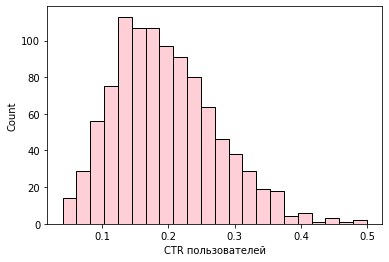

In [9]:
sns.histplot(user_ctr,  color = 'pink')
plt.xlabel('CTR пользователей')
plt.show()

In [13]:
# С другой стороны, каждый пользователь заходит в прложение
# И делает это разное количество раз
# Это скорее будет описыватся Лог-нормальным распределением
# Это рспределение у когорого тяжёлы прявый хвост

# С помощью него мы сможем сгенерировать сколько раз залодити в приложение наши пользователи

view = np.random.lognormal(mean=1, sigma=1, size=user_num).astype(int)+1

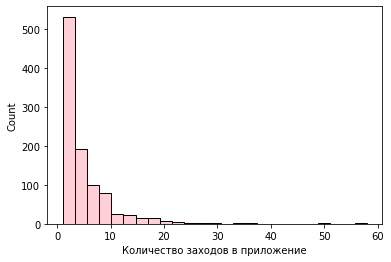

In [17]:
sns.histplot(view, bins=25, color ='pink')
plt.xlabel('Количество заходов в приложение')
plt.show()

In [30]:
# И для того чтобы получить метрику - сколько раз люди воспользовались нашим плейлистом
# (кликнули и начали слушать)
# Мы воспользуемся двумя сгенерированными выборками
# И с помощью распределния биномиального сгенирируем количество кликов по нашему плейлисту

clicks = np.random.binomial(view, user_ctr)
clicks[3]

0

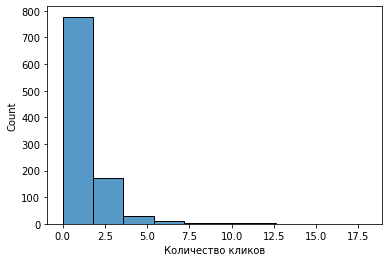

In [19]:
sns.histplot(clicks, bins=10)
plt.xlabel('Количество кликов')
plt.show()

# Получим вот такую иллюстрацию
# У большенства пользователь будет оконо нуля кликов
# Это потому что у большенства пользователей всего один заход


In [24]:
# И теперь для сгенирированных выборок собирём такую выборку,
# где одним обектом будет одна сессия
# И сессия будет заканчиваться НУЛЯМ - если пользователь не стал пользоваться нашим плейлистом
# И ЕДИНИЦЕЙ -если стал

sessions = []
for v, c in zip(view, clicks):
    sessions +=[1]*c +[0]*(v-c)

In [25]:
sessions[:10]

[1, 0, 0, 0, 0, 0, 0, 1, 1, 0]

In [26]:
#  если мы посчитаем среднее по выборке, то толучим порядка 20%
# как мы и генеририли пользователей с такой вероятностью, что 20%
# предпочитают слушать наш плейлист

np.mean(sessions)

0.20229468599033817

In [27]:
len(sessions)

4968

In [ ]:
#  Теперь собираем всё это вместе и эмитируем проведение A/B эксперемента

# Мы итеративно будем генерить такие выборки шде будем генерить пользователей,
# просмотри, их клики
# Случайно разбивать их на группы
# Затем подсчитывать наши выборки и подсчитывать на сколько они отличаютс между собой

def get_pvalue():
    user_ctr = np.random.beta(alpha, beta, size=user_num)
    view = np.random.lognormal(mean=1,  sigm 

In [40]:
# Лучше использоватьНепараметрические методы, поскольку распределение clicks
# далеко от нормального

from scipy.stats import mannwhitneyu

def get_pvalue():
    user_ctr = np.random.beta(alpha, beta, size = user_num)
    view = np.random.lognormal(mean=1, sigma=1, size=user_num).astype(int)+1
    clicks = np.random.binomial(view, user_ctr)
    
    mask= np.random.rand(len(view))< 0.5
    view_1, clicks_1 = view[mask], clicks[mask]
    view_2, clicks_2 = view[~mask], clicks[~mask]
    
    return mannwhitneyu(clicks_1, clicks_2)[1]

In [47]:
# Повторим 10.000 раз и построим распределение p-value:


pvalues = [get_pvalue() for _ in range(10000)]

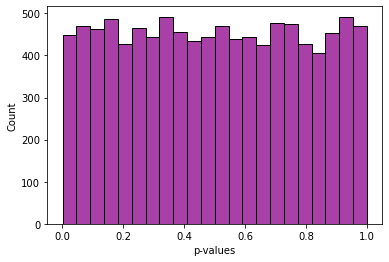

In [48]:
sns.histplot(pvalues, color ='darkmagenta')
plt.xlabel('p-values')
plt.show()

In [49]:
# Отчетливо видно, что p-value распределен равномерно, 
# а количество ложноположительных ответов будет равно 0.05
# (как и было задумано).

np.mean(np.array(pvalues)< 0.05)

0.0479